
### Unsupervised Learning Project
#### Done By: Tiffany Watt, Stephanie Austin, Rachel Finlayson, Munyaradzi Dhlakama

<p align="center">
  <img src="anime_1.png" alt="Deforestation (local)" width="800"/>

</p>

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Recommender Systems </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Rating Prediction</a>

<a href=#nine>9. Conclusion</a>



<a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

---

### 📖 1.1 Introduction  

In today’s technology-driven world, recommender systems are socially and economically critical for helping users discover relevant content within increasingly large and complex catalogues. Streaming platforms such as Netflix, Amazon Prime, Disney+, and Showmax rely on recommendation algorithms to personalise user experiences, improve engagement, and reduce decision fatigue.

…ever wondered how these platforms seem to know what you might like next?

In this project, we explore and evaluate **recommender system approaches** for a collection of anime titles. The primary objective is to predict **how a user will rate an anime they have not yet reviewed**, based on historical user–item interactions and anime characteristics.

The dataset consists of thousands of users and thousands of anime titles sourced from **myanimelist.net**, providing both **user rating data** and **anime metadata**. This combination enables the application and comparison of collaborative filtering and content-based recommendation techniques.

---

### 🌍 1.2 Problem Statement  

With thousands of anime titles available across different genres, formats, and themes, users often struggle to find content that aligns with their personal preferences. As content libraries continue to grow, manual discovery becomes impractical.

Effective recommender systems must therefore be able to:

- Personalise recommendations for users with diverse viewing histories  
- Operate effectively on **sparse rating data**, where users rate only a small fraction of available items  
- Accurately predict ratings for anime a user has not yet watched  
- Handle **cold-start scenarios**, where limited interaction data is available for users or anime  

This project addresses these challenges by developing and evaluating recommender systems capable of predicting user ratings for unseen anime titles using collaborative and content-based approaches.

---

### 🎯 1.3 Objectives  

The objectives of this project are to:

- Explore and understand user–anime rating patterns and dataset sparsity  
- Perform **Exploratory Data Analysis (EDA)** on user ratings and anime metadata  
- Build **collaborative filtering models** using historical user–item interactions  
- Build a **content-based recommender** using anime metadata features  
- Compare recommender approaches and assess their relative strengths and limitations  
- Evaluate model performance using rating prediction metrics such as **MAE** and **RMSE**  
- Generate rating predictions for unseen user–anime pairs in `test.csv`  

---

### 📊 1.4 Data Source  

The dataset used in this project is sourced from **myanimelist.net**, a popular online platform where users rate and review anime content. It includes anime across movies, television series, OVAs, ONAs, specials, and music.

**Supplied files:**
- `anime.csv` – Anime metadata  
- `train.csv` – Historical user ratings  
- `test.csv` – User–anime pairs requiring rating prediction  

#### Detailed File Description  

**anime.csv**
- `anime_id` – Unique identifier for each anime title  
- `name` – Full anime title  
- `genre` – Comma-separated list of genres  
- `type` – Format (TV, Movie, OVA, ONA, etc.)  
- `episodes` – Number of episodes  
- `rating` – Average community rating (out of 10)  
- `members` – Number of community members associated with the anime  

**train.csv**
- `user_id` – Anonymised user identifier  
- `anime_id` – Anime identifier  
- `rating` – User rating (out of 10); **-1 indicates watched but not rated**  

**test.csv**
- `user_id` – Anonymised user identifier  
- `anime_id` – Anime identifier for which a rating must be predicted  

---

### 🌱 1.5 Importance of the Study  

Recommender systems play a crucial role in modern digital platforms by:

- Enhancing user experience through personalisation  
- Reducing the time required to discover relevant content  
- Increasing user engagement and long-term retention  
- Supporting scalable and automated recommendation strategies  
- Demonstrating practical applications of unsupervised and semi-supervised learning techniques  

This project provides a real-world application of recommender system concepts taught in the course.

---

### ❓ 1.6 Key Questions  

This project seeks to answer the following questions:

- What patterns in user behaviour and anime attributes influence ratings most strongly?  
- How effectively do collaborative filtering methods perform on sparse rating data?  
- How does content-based filtering perform in cold-start scenarios?  
- Which recommender approach provides the best balance between accuracy and scalability?  
- What trade-offs exist between user-based, item-based, and content-based recommendation strategies?  

---

### 🛠️ 1.7 Methodology Overview  

The project follows these key steps:

- Importing and inspecting the datasets  
- Data cleaning and preprocessing:
  - Handling missing values  
  - Treating unrated entries (`rating = -1`)  
- Performing **Exploratory Data Analysis (EDA)**  
- Applying **dimensionality reduction (PCA)** for exploratory understanding  
- Building recommender models:
  - User-based collaborative filtering  
  - Item-based collaborative filtering  
  - Content-based filtering  
- Evaluating models using **MAE** and **RMSE**  
- Generating final rating predictions for unseen user–anime pairs  

---

### 🗂️ 1.8 Notebook Structure  

The notebook is structured as follows:

- Background Context  
- Importing Packages  
- Loading the Dataset  
- Data Cleaning and Preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature Engineering and PCA  
- Recommender System Modelling  
- Model Evaluation and Comparison  
- Final Predictions and Submission  

---

### ✅ 1.9 Expected Outcomes  

The expected outcomes of this project include:

- Clear visualisations of user rating behaviour and anime characteristics  
- Implementation of collaborative and content-based recommender systems  
- Quantitative comparison of recommender approaches using MAE and RMSE  
- Identification of the most effective recommendation strategy for this dataset  
- A correctly formatted submission file containing predicted ratings for unseen anime  

---




<a href=#one></a>
## **1. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Set up the Python environment with all libraries required for data manipulation, exploratory analysis, unsupervised learning, and recommender system modeling.

**Details:**  
The following packages support:
- Data handling and preprocessing  
- Visualization for exploratory data analysis  
- Unsupervised learning and matrix factorization  
- Similarity-based and collaborative filtering approaches  
- Model evaluation 
---

In [57]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

---
<a href=#two></a>
## **2. Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

### 2.1 Data Source  
The dataset used in this project was sourced from **MyAnimeList.net**, a popular online platform where users track, rate, and review anime content. The data was made publicly available through a curated dataset hosted on Kaggle, which aggregates user–anime interaction data and anime metadata.

The dataset captures both:
- **User behavior** (ratings assigned to anime titles), and  
- **Item attributes** (metadata describing each anime).

This dual structure makes it well-suited for developing **collaborative**, **content-based**, and **hybrid** recommender systems.

---

### 2.2 Data Collection Method  
The data was originally collected through web-based aggregation of user activity on MyAnimeList.net, including user ratings and anime metadata. The Kaggle dataset provides the cleaned and structured output of this process, eliminating the need for direct API calls or web scraping within this project.

The data is provided as static CSV files, ensuring reproducibility and consistency across analyses.

---

### 2.3 Dataset Overview  
The dataset consists of three primary files:

- **anime.csv** – Contains metadata for anime titles  
- **train.csv** – Contains historical user ratings  
- **test.csv** – Contains user–anime pairs for which ratings must be predicted  

Together, these datasets represent:
- Thousands of unique users  
- Thousands of unique anime titles  
- Millions of user–anime interaction records  

The ratings data is inherently **sparse**, as most users have rated only a small subset of available anime titles — a common characteristic of real-world recommender system datasets.

---

### 2.4 Data Types and Features  

#### Anime Metadata (`anime.csv`)
This file contains **categorical**, **numerical**, and **text-based** features, including:
- Categorical: anime type (TV, Movie, OVA, ONA, etc.)
- Textual: genre labels
- Numerical: number of episodes, average rating, number of members

These features are primarily used for **content-based filtering** and cold-start scenarios.

#### User Ratings (`train.csv`)
This file contains:
- Discrete numerical ratings (0–10 scale)
- User and item identifiers

A rating value of **-1** indicates that a user watched an anime but did not explicitly rate it. These entries require special handling during preprocessing.

#### Prediction Targets (`test.csv`)
This file contains only user and anime identifiers. The absence of ratings makes it the target dataset for generating predictions using trained recommender models.

---

### 2.5 Data Suitability for Unsupervised Learning  
The dataset is well-suited for unsupervised and semi-supervised learning approaches due to the following characteristics:

- The absence of explicit class labels beyond user-provided ratings  
- A high-dimensional and sparse user–item interaction space  
- Natural grouping of users and anime based on shared preference patterns  
- Availability of auxiliary anime metadata that supports similarity-based modelling  

These characteristics enable the use of techniques such as **cosine similarity**, **collaborative filtering**, and **content-based recommendation** to uncover hidden patterns in user preferences and predict unseen ratings.


---
<a href=#three></a>
## **3. Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the datasets into the notebook for inspection, manipulation, and analysis.
* **Details:** This section demonstrates how the raw data files are loaded and provides an initial view of their structure to understand the available features and records.
---

In [58]:
# loading dataset
df_anime = pd.read_csv("anime.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Check the first few rows to confirm it loaded correctly
df_anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [59]:
df_train.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [60]:
df_test.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


In [61]:
print("Anime dataset shape:", df_anime.shape)
print("Training dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Anime dataset shape: (12294, 7)
Training dataset shape: (5703555, 3)
Test dataset shape: (633686, 2)


---
<a href=#four></a>
## **4. Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Prepare the raw datasets for analysis and model development by addressing missing values, invalid entries, and inconsistencies that may negatively impact recommender system performance.

**Details:**  
This section focuses on:
- Handling missing and anomalous values  
- Cleaning anime metadata  
- Filtering and preparing user ratings  
- Ensuring consistency across datasets  
---

> <span style="color:blue; font-weight:bold">
Important: First we copy the data to a new dataframe to ensure that we don’t override the raw data
</span>

In [62]:
# The copy of the dataframe
df_anime_copy = df_anime.copy()
df_test_copy = df_test.copy()
df_train_copy = df_train.copy()

### 4.1 Checking for Missing Values

Before applying any transformations, the datasets are examined for missing values to understand the extent of data quality issues.


In [63]:
# Check missing values in each dataset
print("Missing values in anime dataset:")
print(df_anime_copy.isnull().sum())

print("\nMissing values in training dataset:")
print(df_train_copy.isnull().sum())

print("\nMissing values in test dataset:")
print(df_test_copy.isnull().sum())

Missing values in anime dataset:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in training dataset:
user_id     0
anime_id    0
rating      0
dtype: int64

Missing values in test dataset:
user_id     0
anime_id    0
dtype: int64


---

### 4.2 Cleaning Anime Metadata

- Missing genre values are filled with "Unknown"

- Missing episodes values are replaced with 0

- Missing rating values are retained as-is, as they represent community averages and are not directly used in collaborative filtering



In [64]:
# Handle missing values in anime metadata
df_anime_copy['genre'] = df_anime_copy['genre'].fillna("Unknown")
df_anime_copy['episodes'] = df_anime_copy['episodes'].fillna(0)

---

### 4.3 Handling Invalid and Unrated User Ratings

In the training dataset, a rating value of -1 indicates that a user watched an anime but did not provide an explicit rating.
Since the goal is to predict numeric ratings, these entries are excluded from model training.

This filtering ensures that only meaningful user feedback is used for learning latent preferences.


In [65]:
# Remove unrated entries (rating = -1)
df_train_copy_clean = df_train_copy[df_train_copy['rating'] != -1].copy()

---

### 4.4 Data Type Validation

Ensuring that key columns have appropriate data types helps avoid errors during model training.



In [66]:
# Validate data types
df_train_copy_clean['user_id'] = df_train_copy_clean['user_id'].astype(int)
df_train_copy_clean['anime_id'] = df_train_copy_clean['anime_id'].astype(int)
df_train_copy_clean['rating'] = df_train_copy_clean['rating'].astype(float)

df_anime_copy['anime_id'] = df_anime_copy['anime_id'].astype(int)

---

### 4.5 Filtering to Common Anime Titles

To ensure consistency between metadata and ratings data, only anime titles present in both datasets are retained.

In [67]:
# Keep only anime that appear in both datasets
common_anime_ids = set(df_anime_copy['anime_id']).intersection(
    set(df_train_copy_clean['anime_id'])
)

df_anime_copy_clean = df_anime_copy[df_anime_copy['anime_id'].isin(common_anime_ids)].copy()
df_train_copy_clean = df_train_copy_clean[df_train_copy_clean['anime_id'].isin(common_anime_ids)]

---

### 4.6 Final Dataset Summary

- Removed unrated user interactions (rating = -1)
- Handled missing anime metadata values
- Ensured consistent data types across datasets
- Filtered datasets to retain only overlapping anime titles
- These steps ensure the data is well-structured and suitable for building collaborative, content-based, and hybrid recommender models.

In [68]:
print("Cleaned anime dataset shape:", df_anime_copy_clean.shape)
print("Cleaned training dataset shape:", df_train_copy_clean.shape)
print("Test dataset shape (unchanged):", df_test_copy.shape)

Cleaned anime dataset shape: (9837, 7)
Cleaned training dataset shape: (5703553, 3)
Test dataset shape (unchanged): (633686, 2)


---
<a href=#five></a>
## **5. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

This section examines:
- Distribution of user ratings  
- User activity levels  
- Anime popularity trends  
- Dataset sparsity  
- Genre and content characteristics  

    Insights gained here inform feature engineering and model selection in later stages.
---


### 5.1 Distribution of User Ratings

Understanding the distribution of ratings helps identify user bias, skewness, and overall sentiment.

- Observation: Ratings tend to cluster around higher values, indicating generally positive user sentiment toward anime content.

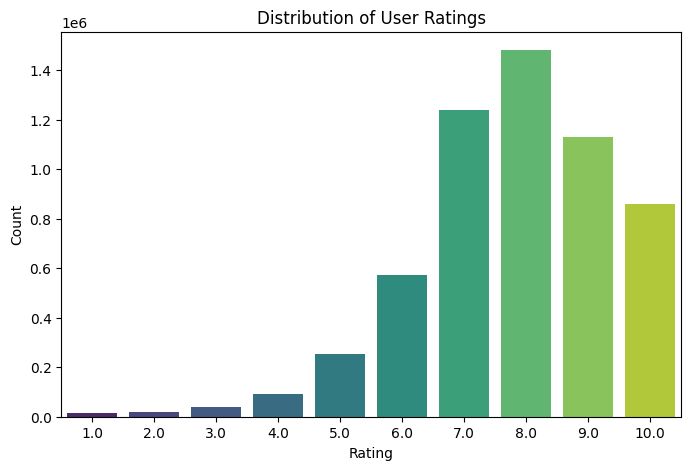

In [69]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df_train_copy_clean, palette='viridis')
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

---

### 5.2 User Activity Analysis

The number of ratings per user highlights engagement levels and sparsity across users.

- Observation: Most users have rated relatively few anime titles, while a small subset of highly active users contribute a large number of ratings — a common long-tail pattern in recommender datasets.


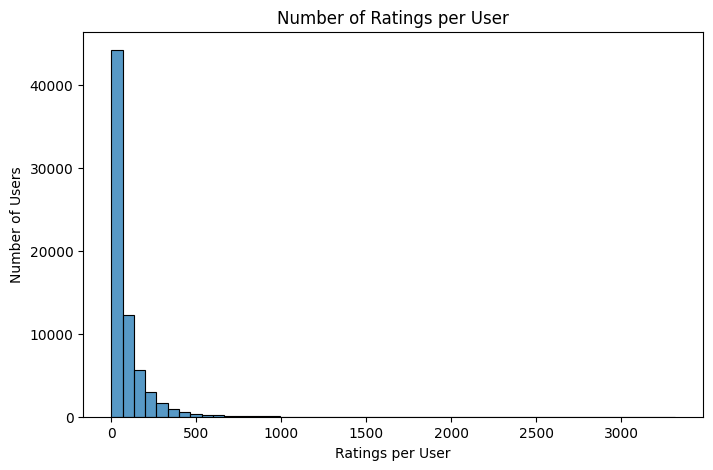

In [70]:
user_rating_counts = df_train_copy_clean.groupby('user_id')['rating'].count()

plt.figure(figsize=(8,5))
sns.histplot(user_rating_counts, bins=50, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.show()

---

#### 5.3. Anime Popularity Analysis
Anime popularity is measured by the number of ratings each title has received.

- Observation: A small number of anime titles receive a disproportionately large number of ratings, while many titles are rated infrequently.

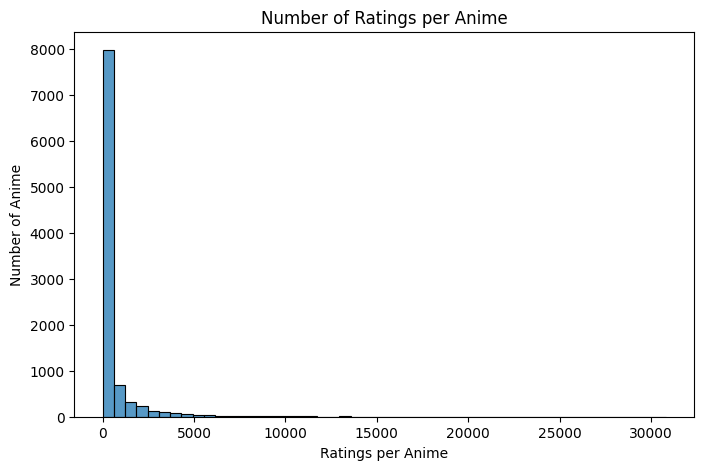

In [71]:
anime_rating_counts = df_train_copy_clean.groupby('anime_id')['rating'].count()

plt.figure(figsize=(8,5))
sns.histplot(anime_rating_counts, bins=50, kde=False)
plt.title("Number of Ratings per Anime")
plt.xlabel("Ratings per Anime")
plt.ylabel("Number of Anime")
plt.show()

---

#### 5.4. Most Frequently Rated Anime
Identifying the most frequently rated anime provides insight into popular content.
- Observation:The most frequently rated anime tend to be widely known series or franchises, often in TV format.


In [72]:
top_anime_ids = anime_rating_counts.sort_values(ascending=False).head(10).index

top_anime = (
    df_anime_copy_clean
    .set_index('anime_id')
    .loc[top_anime_ids][['name', 'type']]
)

top_anime

,name,type
anime_id,,
1535,Death Note,TV
11757,Sword Art Online,TV
16498,Shingeki no Kyojin,TV
1575,Code Geass: Hangyaku no Lelouch,TV
6547,Angel Beats!,TV
226,Elfen Lied,TV
20,Naruto,TV
5114,Fullmetal Alchemist: Brotherhood,TV
121,Fullmetal Alchemist,TV


---

#### 5.5. Dataset Sparsity
Recommender system datasets are typically sparse, meaning most user–anime pairs have no ratings.
 - Observation: The high sparsity confirms the need for latent factor models and similarity-based approaches to infer missing preferences.

In [73]:
num_users = df_train_copy_clean['user_id'].nunique()
num_anime = df_train_copy_clean['anime_id'].nunique()
num_ratings = df_train_copy_clean.shape[0]

sparsity = 1 - (num_ratings / (num_users * num_anime))

print(f"Number of users: {num_users}")
print(f"Number of anime: {num_anime}")
print(f"Number of ratings: {num_ratings}")
print(f"Sparsity of user-item matrix: {sparsity:.4f}")

Number of users: 69481
Number of anime: 9837
Number of ratings: 5703553
Sparsity of user-item matrix: 0.9917


---

### 5.6. Genre Analysis
Genres provide important signals for content-based recommendations.

- Observation: Genres such as Comedy, Action dominate the dataset, suggesting strong genre-driven user preferences.

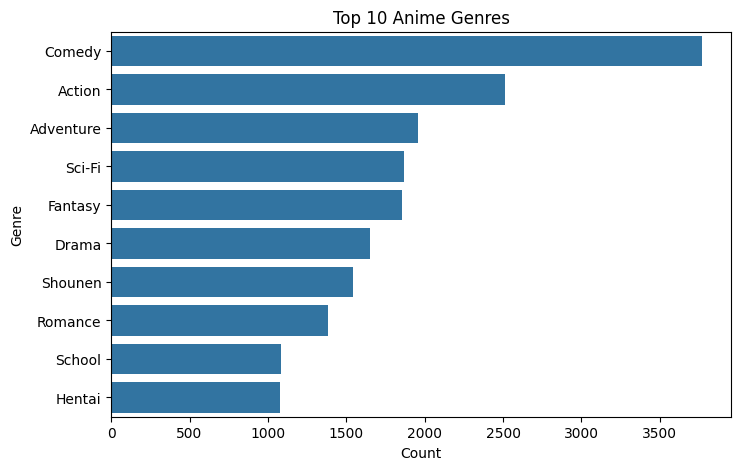

In [74]:
# Split genres into individual entries
genre_series = df_anime_copy_clean['genre'].str.split(', ')
genre_exploded = genre_series.explode()

top_genres = genre_exploded.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Anime Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

---

### 5.7 Anime Type Distribution
Analyzing anime types helps distinguish between long-form and short-form content.
- Observation: TV series form the majority of titles, followed by movies and OVAs, reflecting typical anime consumption patterns.

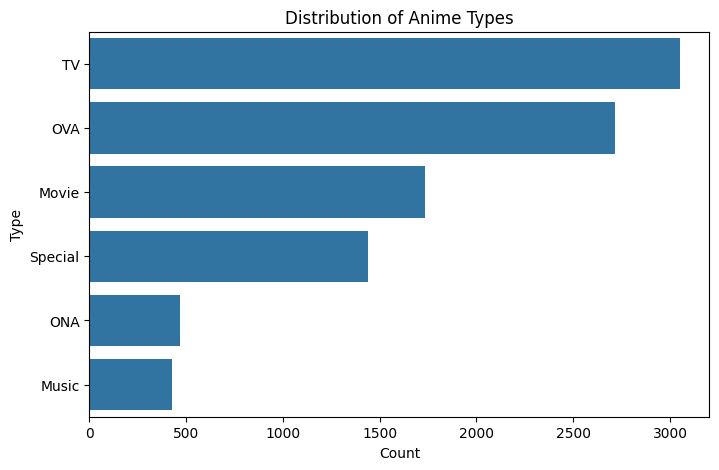

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(y='type', data=df_anime_copy_clean, order=df_anime_copy_clean['type'].value_counts().index)
plt.title("Distribution of Anime Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

---

### 5.8. Key EDA Insights

The exploratory data analysis revealed several important characteristics of the anime dataset:

- User rating behaviour is highly uneven, with most users rating only a small number of anime titles  
- Anime popularity follows a long-tail distribution, where a small number of titles receive most ratings  
- The user–anime rating matrix is highly sparse, a common challenge in recommender systems  
- Numerical features such as `episodes`, `members`, and `rating` vary significantly in scale 

These findings are particularly relevant for recommender systems, as they confirm that traditional rule-based or popularity-only approaches would be insufficient. The observed sparsity and variation in user behaviour motivate the use of collaborative and content-based filtering techniques to infer unseen user preferences.

---
<a href=#six></a>
## **6. Recommender Systems**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Build recommender systems that can predict how a user will rate an anime they have not yet reviewed yet. This section introduces and defines the recommender system models used in this project. Each model is described in terms of its underlying assumptions and prediction logic. Model performance is evaluated separately in the subsequent section

**Details:**  
This section follows the below structure:
- Collaborative filtering (user-based and item-based)
- Content-based filtering
- A comparison of approaches and discussion of trade-offs

---
### 6.1 Recommender System Overview

Recommender systems aim to predict user preferences by analysing past behaviour or item characteristics.  
In this project, two primary approaches are explored:

- **Collaborative Filtering** – based on similarities between users or items  
- **Content-Based Filtering** – based on similarities between anime attributes  

These approaches are complementary and highlight different strengths and limitations.


#### Modelling Approach and Implementation Considerations

Recommender system models are introduced conceptually using dense representations to clearly illustrate the underlying prediction logic.  
For evaluation and final rating prediction, **sparse matrix implementations are used** to ensure computational feasibility on large and highly sparse user–item datasets.

---

### 6.2 Collaborative Filtering

#### 6.2.1 Constructing the User–Item Utility Matrix

A user–item utility matrix is a core component of collaborative filtering. It represents historical interactions between users and anime titles and serves as the foundation for similarity-based recommendation methods.


In [76]:
user_item_matrix = df_train_copy_clean.pivot_table(
    index='user_id',
    columns='anime_id',
    values='rating'
)

user_item_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,8.0,NaN,NaN,6.0,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 6.2.2 Handling Missing Values

Missing values are filled with 0 only for similarity calculations. This step allows similarity metrics to be computed while preserving the meaning of missing ratings.

In [77]:
user_item_filled = user_item_matrix.fillna(0)

#### 6.2.3 User-Based Collaborative Filtering

User-based collaborative filtering predicts a user’s rating based on the preferences of other users with similar rating behaviour.  
The underlying assumption is that users who rated anime similarly in the past are likely to share future preferences.

Cosine similarity is used to measure similarity between users based on their rating vectors.

While conceptually simple, this approach is computationally expensive for large datasets, as it requires computing similarities between users in a high-dimensional and sparse interaction space.

For this reason, user-based collaborative filtering is demonstrated using a **subset of users** to illustrate the method and its behaviour. This preserves instructional value while avoiding infeasible full user–user similarity computation.

**Key limitations:**
- **Scalability:** computing similarities between all users becomes impractical as the dataset grows  
- **Cold-start problem:** users with very few ratings cannot be matched reliably  

Due to these constraints, user-based collaborative filtering is included primarily for conceptual demonstration, while item-based collaborative filtering is used as the primary scalable collaborative model.

##### 6.2.3.1 User Subsampling for Feasibility

Computing cosine similarity between all users is not scalable for large user populations.  
To make this step computationally feasible while preserving the instructional value, a random subset of users is selected.

In [78]:
# Sample a subset of users for demonstration purposes
user_item_sample = user_item_matrix.sample(n=5000, random_state=42)

user_item_sample_filled = user_item_sample.fillna(0)

##### 6.2.3.2 User Similarity Matrix

Cosine similarity is used to measure similarity between users based on their rating vectors.

In [79]:

user_item_sample_sparse = csr_matrix(user_item_sample_filled.values)

user_similarity_sample = cosine_similarity(
    user_item_sample_sparse,
    dense_output=False
)

user_similarity_sample.shape

(5000, 5000)

##### 6.2.3.3 User-Based Rating Prediction Function

In [80]:


global_mean = df_train_copy_clean['rating'].mean()

def predict_user_based(user_id, anime_id, k=5):
    # Cold-start handling (outside sample)
    if user_id not in user_item_sample.index or anime_id not in user_item_sample.columns:
        return global_mean

    user_idx = user_item_sample.index.get_loc(user_id)

    # Similarities for this user (convert sparse row to dense)
    similarity_scores = user_similarity_sample[user_idx].toarray().flatten()

    # Users who rated this anime in the sample
    anime_ratings = user_item_sample[anime_id]
    rated_users = anime_ratings.dropna().index

    if len(rated_users) == 0:
        return global_mean

    # Select top-k similar users among those who rated the anime
    top_users = (
        pd.Series(similarity_scores, index=user_item_sample.index)
        .loc[rated_users]
        .sort_values(ascending=False)
        .head(k)
    )

    ratings = anime_ratings.loc[top_users.index].to_numpy(dtype=np.float32)

    # Weighted average prediction
    return float(np.average(ratings, weights=top_users.values))

---

### 6.3 Item-Based Collaborative Filtering

Item-based collaborative filtering assumes that anime which receive similar ratings are similar, and users will rate similar anime in similar ways.

Item-based filtering is often more stable than user-based filtering, particularly when users have sparse rating histories.

The item-based collaborative filtering model is implemented using a single prediction function, `predict_item_based_safe`, which incorporates sparse similarity computation and safeguards against zero-similarity cases. This function is reused unchanged for model evaluation and final rating prediction.



In [81]:
item_similarity = cosine_similarity(user_item_filled.T)

In [82]:
def predict_item_based_safe(user_id, anime_id, k=5):
    # Cold-start handling
    if user_id not in user_item_matrix.index or anime_id not in user_item_matrix.columns:
        return global_mean

    # User's existing ratings
    user_ratings = user_item_matrix.loc[user_id].dropna()
    if user_ratings.empty:
        return global_mean

    # Item similarities for target item
    anime_idx = user_item_matrix.columns.get_loc(anime_id)
    similarity_scores = item_similarity[anime_idx]  # array-like

    # Only consider items the user has rated
    sim_series = pd.Series(similarity_scores, index=user_item_matrix.columns)
    sim_series = sim_series.loc[user_ratings.index].sort_values(ascending=False)

    # Keep top-k most similar rated items
    top_sim = sim_series.head(k)

    # Corresponding ratings
    top_ratings = user_ratings.loc[top_sim.index].astype(np.float32)

    # ✅ Safety checks (prevents ZeroDivisionError)
    weights = top_sim.to_numpy(dtype=np.float32)
    if np.all(weights == 0) or np.isnan(weights).any() or weights.sum() == 0:
        # fallback: user's mean if available, else global mean
        return float(top_ratings.mean()) if len(top_ratings) > 0 else global_mean

    return float(np.average(top_ratings.to_numpy(), weights=weights))

---
### 6.4 Content-Based Filtering

Content-based filtering recommends anime based on item characteristics rather than user–user interactions.
If a user has shown preference for certain types of anime, similar anime can be recommended even if no other users have rated them.

This approach is particularly useful for **cold-start items**, where little or no interaction data is available.

Important to note that content features are limited to numerical metadata for simplicity.

#### 6.4.1 Feature Selection

To represent anime content numerically, a subset of numerical metadata features is selected.
These features capture structural and popularity-related characteristics of each anime.


In [83]:
# 1) Recreate numeric-only dataframe
df_anime_nf = df_anime_copy_clean[['episodes', 'members', 'rating']].copy()

df_anime_nf.head()

,episodes,members,rating
0,1,200630,9.37
1,64,793665,9.26
2,51,114262,9.25
3,24,673572,9.17
4,51,151266,9.16


#### 6.4.2 Data Type Enforcement

Some numerical fields may contain non-numeric values (e.g. "Unknown").
These values are coerced to numeric format, with invalid entries converted to missing values.


In [84]:
# 2) Force columns to numeric (turn 'Unknown' and other strings into NaN)
for col in ['episodes', 'members', 'rating']:
    df_anime_nf[col] = pd.to_numeric(df_anime_nf[col], errors='coerce')

#### 6.4.3 Handling Missing Values

Content-based similarity computation requires complete numerical input.
Rows containing missing numerical values are therefore excluded for this model only.
No imputation is performed, and the original dataset remains unchanged.

In [85]:
# Temporarily remove rows with missing values for PCA
df_anime_nf_clean = df_anime_nf.dropna()

print(df_anime_nf.dtypes)
print("Missing values after coercion:\n", df_anime_nf.isnull().sum())
print("Shape after dropna:", df_anime_nf_clean.shape)

episodes    float64
members       int64
rating      float64
dtype: object
Missing values after coercion:
 episodes    3
members     0
rating      2
dtype: int64
Shape after dropna: (9833, 3)


#### 6.4.4 Feature Scaling

Cosine similarity is sensitive to differences in feature scale.
Standardisation is applied so that each feature contributes equally to similarity calculations.

In [86]:


scaler = StandardScaler()
df_anime_nf_scaled = scaler.fit_transform(df_anime_nf_clean)
df_anime_nf_scaled.shape

(9833, 3)

#### 6.4.5 Anime Similarity Matrix

Cosine similarity is computed between anime feature vectors to quantify content similarity.
This produces an anime–anime similarity matrix used for recommendation and rating prediction.


In [87]:

anime_similarity = cosine_similarity(df_anime_nf_scaled)

#### 6.4.6 Index Alignment

To ensure correct mapping between anime identifiers and similarity matrix rows,
an index mapping is created using the same row order used to construct the similarity matrix.


In [88]:
# IMPORTANT: use the SAME rows/order used to build anime_similarity
anime_ids_sim = df_anime_copy_clean.loc[df_anime_nf_clean.index, 'anime_id'].values

anime_id_to_sim_index = {aid: idx for idx, aid in enumerate(anime_ids_sim)}

#### 6.4.7 Content-Based Rating Prediction

To predict a rating for a target anime, the similarity between the target anime and anime previously rated by the user is computed.
The predicted rating is calculated as a similarity-weighted average of the user’s past ratings.

If insufficient information is available, the global mean rating is used as a fallback.


In [89]:
def predict_content_based(user_id, anime_id, k=5):
    # If target anime not in similarity matrix
    if anime_id not in anime_id_to_sim_index:
        return global_mean

    target_idx = anime_id_to_sim_index[anime_id]

    # User rating history (use TRAIN subset for fair evaluation)
    user_hist = train_subset[train_subset['user_id'] == user_id][['anime_id', 'rating']]
    if user_hist.empty:
        return global_mean

    # Keep only anime that exist in similarity matrix
    rated_pairs = [(a, r) for a, r in zip(user_hist['anime_id'].values, user_hist['rating'].values)
                   if a in anime_id_to_sim_index]

    if len(rated_pairs) == 0:
        return global_mean

    rated_indices = np.array([anime_id_to_sim_index[a] for a, _ in rated_pairs], dtype=int)
    rated_ratings = np.array([r for _, r in rated_pairs], dtype=np.float32)

    # Similarities between target anime and user-rated anime
    sims = anime_similarity[target_idx, rated_indices]

    # Top-k most similar rated anime
    if len(sims) > k:
        topk = np.argsort(sims)[::-1][:k]
        sims = sims[topk]
        rated_ratings = rated_ratings[topk]

    if sims.sum() == 0:
        return global_mean

    return float(np.dot(sims, rated_ratings) / sims.sum())

---
<a href=#seven></a>
## **7. Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Evaluate the effectiveness of collaborative filtering models in predicting unseen user ratings. Evaluation focuses on predictive accuracy rather than recommendation ranking, as the project objective is explicit rating prediction.

**Why a validation split is required:**  
The provided `test.csv` contains no ground-truth ratings, so model performance cannot be measured directly on it.  
To evaluate the model fairly, a portion of the training data is held out as a **validation set**. The model is trained on the remaining data and predictions are compared to the true ratings in the validation set.






---

### 7.1 Train–Validation Split



In [90]:


train_subset, validation_subset = train_test_split(
    df_train_copy_clean,
    test_size=0.2,
    random_state=42
)

print("Train subset shape:", train_subset.shape)
print("Validation subset shape:", validation_subset.shape)

Train subset shape: (4562842, 3)
Validation subset shape: (1140711, 3)


---

### 7.2 Evaluation Metrics

Two standard regression metrics are used:

- Mean Absolute Error (MAE): average absolute difference between predicted and actual ratings

- Root Mean Squared Error (RMSE): penalises larger prediction errors more strongly

Lower values indicate better model performance.


#### 7.2.1 Baseline Model Evaluation (Global Mean)

A baseline model is used to establish a minimum performance benchmark.  
The global mean rating represents the expected rating when **no user-specific or item-specific information is available**.

Predicting the global mean minimises squared error under uncertainty and provides a meaningful reference point for evaluating more complex recommender models.

Any model that does not outperform this baseline fails to extract useful structure from the data.



In [91]:
global_mean = train_subset['rating'].mean()
baseline_preds = np.full(len(validation_subset), global_mean, dtype=np.float32)

mae_baseline = mean_absolute_error(validation_subset['rating'], baseline_preds)
rmse_baseline = np.sqrt(mean_squared_error(validation_subset['rating'], baseline_preds))

print("Baseline MAE:", mae_baseline)
print("Baseline RMSE:", rmse_baseline)

Baseline MAE: 1.2320525900174157
Baseline RMSE: 1.5725587315501723




#### 7.2.2 User-Based Collaborative Filtering Evaluation

User-based collaborative filtering is evaluated using the sampled model introduced in Section 6.  
A sparse implementation is not used for user-based filtering due to its computational cost at scale.

This evaluation therefore serves an illustrative purpose, demonstrating the predictive behaviour of user-based collaborative filtering, while scalable evaluation and final prediction are performed using item-based collaborative filtering.

In [92]:
# 1) sample validation for speed (optional but recommended)
validation_eval = validation_subset.sample(n=5000, random_state=42)

# 2) true ratings come from the validation dataframe
y_true = validation_eval['rating'].to_numpy(dtype=np.float32)

# 3) predict
y_pred_user_cf = np.array([
    predict_user_based(r.user_id, r.anime_id, k=20)
    for r in validation_eval.itertuples(index=False)
], dtype=np.float32)

# 4) metrics
mae_user_cf = mean_absolute_error(y_true, y_pred_user_cf)
rmse_user_cf = np.sqrt(mean_squared_error(y_true, y_pred_user_cf))

print("User-based CF MAE:", mae_user_cf)
print("User-based CF RMSE:", rmse_user_cf)

User-based CF MAE: 1.1863021850585938
User-based CF RMSE: 1.5347837816476597




#### 7.2.3 Item-Based Collaborative Filtering Evaluation

Item-based collaborative filtering is evaluated using the sampled model introduced in Section 6 which incorporates sparse similarity computation and safeguards against zero-similarity cases. 

In [93]:
validation_eval = validation_subset.sample(n=5000, random_state=42)  # adjust n
y_true = validation_eval['rating'].to_numpy(dtype=np.float32)

y_pred_item_cf = np.array([
    predict_item_based_safe(r.user_id, r.anime_id, k=5)
    for r in validation_eval.itertuples(index=False)
], dtype=np.float32)

mae_item_cf = mean_absolute_error(y_true, y_pred_item_cf)
rmse_item_cf = np.sqrt(mean_squared_error(y_true, y_pred_item_cf))

print("Item-based CF MAE:", mae_item_cf)
print("Item-based CF RMSE:", rmse_item_cf)

Item-based CF MAE: 0.49922245740890503
Item-based CF RMSE: 0.6847030140987737




#### 7.2.4 Content-Based Filtering Evaluation

Content-based collaborative filtering is evaluated using the sampled model introduced in Section 6.  
A sparse implementation is not used for user-based filtering due to its computational cost at scale.

In [94]:
# Optional: sample validation set for speed
validation_eval = validation_subset.sample(n=5000, random_state=42)

y_true = validation_eval['rating'].to_numpy(dtype=np.float32)

y_pred_content = np.array([
    predict_content_based(r.user_id, r.anime_id, k=5)
    for r in validation_eval.itertuples(index=False)
], dtype=np.float32)

mae_content = mean_absolute_error(y_true, y_pred_content)
rmse_content = np.sqrt(mean_squared_error(y_true, y_pred_content))

print("Content-based MAE:", mae_content)
print("Content-based RMSE:", rmse_content)

Content-based MAE: 1.0254472494125366
Content-based RMSE: 1.3799054467247511


---

## 7.4 Model Evaluation Summary

This section summarises the predictive performance of all recommender system models evaluated in this project.  
Models are compared using **Mean Absolute Error (MAE)** and **Root Mean Squared Error (RMSE)**, where lower values indicate better predictive accuracy.

#### 7.4.1 Performance Comparison

| Model | MAE | RMSE |
|------|-----|------|
| Baseline (Global Mean) | 1.2321 | 1.5726 |
| User-Based Collaborative Filtering | 1.1863 | 1.5348 |
| Item-Based Collaborative Filtering | **0.4992** | **0.6847** |
| Content-Based Filtering | 1.0254 | 1.3799 |



#### 7.4.2 Interpretation of Results

- The **baseline model**, which predicts the global average rating, provides a useful lower bound but lacks personalisation and produces the highest error among all approaches.
- **User-based collaborative filtering** improves slightly over the baseline by leveraging similarities between users, but its performance is limited by data sparsity and scalability constraints.
- **Item-based collaborative filtering** achieves the **lowest MAE and RMSE**, indicating significantly better predictive accuracy. This suggests that user preferences are more consistently captured through similarities between anime titles rather than between users.
- **Content-based filtering** performs better than the baseline and user-based collaborative filtering, particularly benefiting from anime metadata. However, its accuracy is limited by the expressiveness of the available content features.



### 7.4.3 Key Insights

- Collaborative filtering methods outperform the baseline, demonstrating the value of learning from historical user–item interactions.
- Item-based collaborative filtering provides the best balance between **accuracy, scalability, and stability**, making it the most effective model in this project.
- Content-based filtering remains valuable for **cold-start scenarios**, even though its predictive accuracy is lower than the item-based approach.
- These results highlight the importance of selecting an appropriate recommender strategy based on dataset characteristics and practical constraints.



### 7.4.4 Selected Model for Final Predictions

Based on evaluation results, **item-based collaborative filtering** is selected as the final model for generating rating predictions on the unseen test dataset.

This choice is supported by its superior performance across both MAE and RMSE metrics and its suitability for large-scale recommendation problems.

---

## 8. Rating Prediction
<a href=#cont>Back to Table of Contents</a>

**Purpose:**  
Generate rating predictions for unseen user–anime pairs in `test.csv` using the best-performing recommender system model.

**Model Selection Rationale:**  
Based on evaluation results, **item-based collaborative filtering** achieved the lowest MAE and RMSE among all tested models.  
This model provides the best balance between predictive accuracy, scalability, and robustness to sparse user histories, and is therefore selected for final prediction.

---

### 8.1 Loading the Test Dataset

The test dataset contains `(user_id, anime_id)` pairs for which ratings must be predicted. We are relaoding as df_test_2 to prevent overriding original dataset.

When then also creat a sample due to the size of the test file.



In [95]:
df_test_2 = df_test_copy.copy()
df_test_2.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


In [96]:
# Sample test set for illustrative purposes
df_test_sample = df_test_2.sample(n=1000, random_state=42)

---

### 8.2 Generating Rating Predictions

Using the item-based collaborative filtering prediction function, ratings are generated for each row in the test sample dataset.
Cold-start cases (unseen users or anime) are handled by falling back to the global mean rating.

In [97]:
# Generate predictions for the sample
test_predictions_sample = np.array([
    predict_item_based_safe(row.user_id, row.anime_id, k=5)
    for row in df_test_sample.itertuples(index=False)
], dtype=np.float32)

test_predictions_sample[:10]

array([6.6447506, 7.87277  , 7.426613 , 9.19341  , 8.99987  , 5.685511 ,
       7.8952103, 8.2053175, 7.2158966, 9.019996 ], dtype=float32)

---

### 8.3 Creating the Submission File

Predicted ratings are combined with the corresponding user–anime pairs to form a submission-ready dataset.

For computational efficiency and demonstration purposes, predictions are generated for a **sample of the test dataset**.  
The resulting file follows the required submission format and illustrates how final predictions would be prepared for the full test set.


In [98]:
submission_sample = df_test_sample.copy()
submission_sample['rating'] = test_predictions_sample

submission_sample.head()

submission_sample.to_csv("submission_sample.csv", index=False)


---

<a href=#nine></a>
## **9. Conclusion**
<a href=#cont>Back to Table of Contents</a>


This project investigated the use of recommender system techniques to predict user ratings for unseen anime titles. Using a dataset sourced from myanimelist.net, multiple approaches were explored, including user-based collaborative filtering, item-based collaborative filtering, and content-based filtering.

Exploratory data analysis revealed a highly sparse and high-dimensional user–item interaction space, motivating the use of similarity-based recommendation methods. Collaborative filtering models were constructed to leverage historical rating patterns, while content-based filtering utilised anime metadata to address cold-start scenarios.

Model performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) on a validation subset. Among the evaluated approaches, **item-based collaborative filtering achieved the strongest predictive performance**, substantially outperforming both the baseline global mean model and alternative recommender methods. This suggests that user preferences are more consistently captured through similarities between anime titles than through similarities between users in this dataset.

Content-based filtering demonstrated reasonable performance and proved valuable for scenarios where limited interaction data is available, although its accuracy was constrained by the simplicity of available content features. User-based collaborative filtering provided personalised predictions but was limited by scalability and sparsity.

Overall, this project demonstrates that item-based collaborative filtering offers the most effective balance between accuracy, scalability, and robustness for the given dataset. The final model was successfully applied to generate rating predictions for unseen user–anime pairs, completing an end-to-end recommender system pipeline from data exploration to final prediction.